In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import IPython.display as display
from PIL import Image

import glob

In [ ]:
path_list = []
for filename in glob.glob('../train/img_align_celeba/*.jpg'): 
    path_list.append(filename)

path_list.sort()
print(len(path_list))

In [3]:
X = tf.placeholder(shape=[None, 192, 192, 3], dtype="float32", name="X")

W1 = tf.get_variable("W7", [5,5,3,128], initializer=tf.contrib.layers.xavier_initializer(seed = 0))
W2 = tf.get_variable("W8", [3,3,128,128], initializer=tf.contrib.layers.xavier_initializer(seed = 0))
W3 = tf.get_variable("W9", [3,3,128,128], initializer=tf.contrib.layers.xavier_initializer(seed = 0))
W4 = tf.get_variable("W10", [3,3,128,128], initializer=tf.contrib.layers.xavier_initializer(seed = 0))
W5 = tf.get_variable("W11", [3,3,128,128], initializer=tf.contrib.layers.xavier_initializer(seed = 0))
W6 = tf.get_variable("W12", [5,5,128,3], initializer=tf.contrib.layers.xavier_initializer(seed = 0))

#conv2d, max_pool, ativation
Z1 = tf.nn.conv2d(X,W1, strides = [1,1,1,1], padding = 'SAME')
P1 = tf.nn.max_pool(Z1, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'SAME')
A1 = tf.nn.relu(P1)

#conv2d, max_pool, ativation
Z2 = tf.nn.conv2d(A1,W2, strides = [1,1,1,1], padding = 'SAME')
P2 = tf.nn.max_pool(Z2, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'SAME')
A2 = tf.nn.relu(P2)

#conv2d, max_pool
Z3 = tf.nn.conv2d(A2,W3, strides = [1,1,1,1], padding = 'SAME')
P3 = tf.nn.max_pool(Z3, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'SAME')

# Start to decode
#upsample, conv2d
UP3 = tf.keras.layers.UpSampling2D(size = (2,2))(P3)
UZ3 = tf.nn.conv2d(UP3,W4, strides = [1,1,1,1], padding = 'SAME')

#activation, upsample, conv2d
UA3 = tf.nn.relu(UZ3)
UP2 = tf.keras.layers.UpSampling2D(size = (2,2))(UA3)
UZ2 = tf.nn.conv2d(UP2,W5, strides = [1,1,1,1], padding = 'SAME')

#activation, upsample, conv2d
UA2 = tf.nn.relu(UZ2)
UP1 = tf.keras.layers.UpSampling2D(size = (2,2))(UA2)
output = tf.nn.conv2d(UP1,W6, strides = [1,1,1,1], padding = 'SAME')

loss=tf.reduce_mean(tf.square(output-X))

optimizer=tf.train.AdamOptimizer(0.0001)
train=optimizer.minimize(loss)

init=tf.global_variables_initializer()


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Colocations handled automatically by placer.


In [12]:
X_train = []

In [ ]:
#have to load the images in bathes of 30,000 otherwise memory blows up even on ec2. This is only an example of of loading the first batch
for sample in range(30000):
    if sample%100 == 0:
        print(sample)
    path = path_list[sample]
    img = Image.open(path)
    img = img.resize((192, 192), Image.BICUBIC)
    pix = np.array(img.getdata()).reshape(192, 192, 3)
    X_train.append(pix/255.0)


In [ ]:
plt.imshow(X_train[-1])

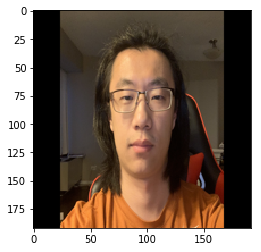

In [8]:
exp1 = '../image1.jpeg'
img1 = Image.open(exp1)
img1 = img1.rotate(-90)
img1 = img1.resize((192, 192), Image.BICUBIC)
pix1 = np.array(img1.getdata()).reshape(192, 192, 3)/255.0
plt.imshow(pix1)

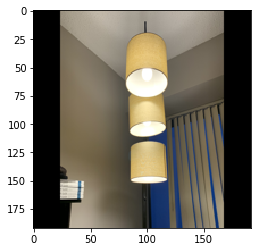

In [9]:
exp2 = '../image2.jpeg'
img2 = Image.open(exp2)
img2 = img2.rotate(-90)
img2 = img2.resize((192, 192), Image.BICUBIC)
pix2 = np.array(img2.getdata()).reshape(192, 192, 3)/255.0
plt.imshow(pix2)

In [ ]:
sess = tf.Session()
ima = 0
cost_list = []
with sess:
        
    # Run the initialization
    sess.run(init)

    # Do the training loop
    batch_size = 50
    total_samples = len(X_train)

    for epoch in range(3):
        epoch_cost = 0
        minibatches = int(total_samples/batch_size)
        for minibatch in range(minibatches):
            batch = np.asarray(X_train[minibatch*batch_size: (minibatch+1)*batch_size])
            _ , minibach_cost = sess.run([train,loss], feed_dict={X: batch})
            cost_list.append(minibatch_cost)
            epoch_cost += minibach_cost
            
            if (minibatch+1)%10 == 0:
                print("epoch {} cost {} in batch {}".format(epoch,epoch_cost/batch_size,minibatch))
                

        print("epoch {} cost {}".format(epoch,epoch_cost/total_samples))
    
    plt.imshow(output.eval(feed_dict={X:[X_train[29999]]})[0])
    ima = output.eval(feed_dict={X:[X_train[29999]]})[0]
    ime = output.eval(feed_dict={X:[pix1]})[0]
    ime2 = output.eval(feed_dict={X:[pix2]})[0]